# collaborative item based Recommender


In [97]:
import pandas as pd
from scipy import sparse # shrink filesize of df
# pw will give us distances (0...n) based on cosine similarity
from sklearn.metrics.pairwise import pairwise_distances
%matplotlib inline
import matplotlib.pyplot as plt

In [99]:
books=  pd.read_csv("../data/books_desc.csv")
print( f"shape of the books dataframe is {books.shape}")
books.head(1)

shape of the books dataframe is (10074, 12)


,title,book_id,goodreads_book_id,authors,description,original_publication_year,language_code_b,average_rating,ratings_count,num_pages,is_ebook,publication_timeframe
0,"Angels (Walsh Family, #3)",3998,82747,Marian Keyes,Maggie has always been the white sheep of the ...,2002,0,3.73,25680,448,False,3


In [100]:
ratings = pd.read_csv("../data/ratings.csv")
print( f"shape of the books dataframe is {ratings.shape}")
ratings.head(1)

shape of the books dataframe is (5976479, 3)


,user_id,book_id,rating
0,1,258,5


In [152]:
def build_item_based_collab(books,ratings):
    df =pd.merge(books[['book_id','title']],ratings, how ='inner',left_on ='book_id',right_on='book_id')
    pivot =df.pivot_table(index ='title',columns ='user_id',values='rating')
    pivot_sparse = sparse.csr_matrix(pivot.fillna(0))
    recommender =pairwise_distances(pivot_sparse,metric='cosine')
    recommender_df = pd.DataFrame(recommender , index =pivot.index,columns =pivot.index)
    return recommender_df
def recommend(recommender_df,book_id, n=3):
    title = books.loc[books['book_id'] == book_id,'title'].values[0]
    return recommender_df[title].sort_values()[1:n+1].index.to_list()

In [153]:
books=  pd.read_csv("../data/books_desc.csv")
ratings = pd.read_csv("../data/ratings.csv")
recommender_df = build_item_based_collab(books,ratings)
recommend(recommender_df,5)

['To Kill a Mockingbird', 'The Catcher in the Rye', 'Animal Farm']

In [156]:
recommend(recommender_df,5) 

['To Kill a Mockingbird', 'The Catcher in the Rye', 'Animal Farm']

In [154]:
df =pd.merge(books[['book_id','title']],ratings, how ='inner',left_on ='book_id',right_on='book_id')

In [159]:
def build_item_user_collab(books,ratings):
    df =pd.merge(books[['book_id','title']],ratings, how ='inner',left_on ='book_id',right_on='book_id')
    pivot =df.pivot_table(index ='user_id',columns ='title',values='rating')
    pivot_sparse = sparse.csr_matrix(pivot.fillna(0))
    recommender =pairwise_distances(pivot_sparse,metric='cosine')
    recommender_df = pd.DataFrame(recommender , index =pivot.index,columns =pivot.index)
    return recommender_df
def recommend(recommender_df,book_id, n=3):
    title = books.loc[books['book_id'] == book_id,'title'].values[0]
    return recommender_df[title].sort_values()[1:n+1].index.to_list()

In [ ]:
df= build_item_user_collab(books,ratings)
df

In [ ]:
lst_new = [8084,4844,10056,10032]
lst = [1010,314,4267,189,8399,1694,294,3577,258,2514,570,157,257,3298,255,5,69,2665,8399,769,7983]
print("|Title |Author |Score |Cluster|Book id|")
for i in lst:
    title = books[books['book_id'] == i]['title'].to_list()[0]
    print(f" ==> {title}, {i}")
    print(recommender_df[title].sort_values()[1:3])

In [50]:
books =pd.merge(books[['book_id','title']],ratings, how ='inner',left_on ='book_id',right_on='book_id')
books.head(1)

,book_id,title,user_id,rating
0,3998,"Angels (Walsh Family, #3)",324,4


In [51]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [52]:
len(ratings['book_id'].unique()),len(ratings['user_id'].unique())
# we  have. double the number of books than the users so , there is a very good chance that
# each user has read multiple books and they have over lap.

(10000, 53424)

In [53]:
# Find out if users have done  multiple book reviews?
ratings.groupby('user_id')['book_id'].value_counts().sort_values()

user_id  book_id
1        4          1
34952    1758       1
         1624       1
         1597       1
         1582       1
                   ..
17159    1366       1
         1326       1
         1312       1
         1115       1
53424    9849       1
Name: book_id, Length: 5976479, dtype: int64

In [54]:
ratings.groupby('book_id')['user_id'].count().describe()

count    10000.000000
mean       597.647900
std       1267.289788
min          8.000000
25%        155.000000
50%        248.000000
75%        503.000000
max      22806.000000
Name: user_id, dtype: float64

Text(0.5, 1.0, ' Numer of users reviewing the books')

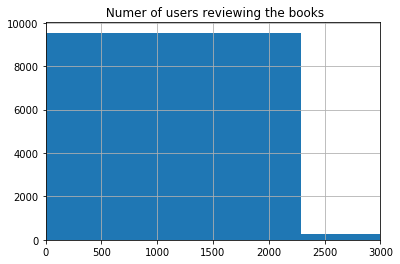

In [55]:
# Find out if users have done  multiple book reviews?
ratings.groupby('book_id')['user_id'].count().hist()
plt.xlim(0,3000)
plt.title(" Numer of users reviewing the books")

In [56]:
# Are there any books that we don't have ratings for?
print(f" Difference in books in ratings and books dataset {len(set(books['book_id']) - set(ratings['book_id']))}.")
print(f" Out of {len(set(books['book_id']))} books we have ratings for all {len(set(ratings['book_id']))} books.")

 Difference in books in ratings and books dataset 0.
 Out of 9964 books we have ratings for all 10000 books.


###### Create pivot table
---

Because we're creating an item-based collaborative recommender (where item in this case is our books), we'll set up our pivot table as follows:
1. The `title` will be the index
2. The `userId` will be the column
3. The `rating` will be the value

In [57]:
pivot =books.pivot_table(index ='title',columns ='user_id',values='rating')
pivot

user_id,1,2,3,4,5,6,7,8,9,10,...,53415,53416,53417,53418,53419,53420,53421,53422,53423,53424
title,,,,,,,,,,,,,,,,,,,,,
"Angels (Walsh Family, #3)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#GIRLBOSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
"'Tis (Frank McCourt, #2)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
واحة الغروب,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
يوتوبيا,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ڤيرتيجو,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
#turn the matrix in to  sparse matrix
pivot_sparse = sparse.csr_matrix(pivot.fillna(0))
pivot_sparse.shape

(9964, 53424)

In [59]:
import sys
sys.getsizeof(pivot),sys.getsizeof(pivot_sparse)

(4259434153, 64)

In [60]:
# Feed sparse matrix to pair wise disance to calculate. distance between every book
recommender =pairwise_distances(pivot_sparse,metric='cosine')

In [61]:
#Create distance dataframe
recommender_df = pd.DataFrame(recommender , index =pivot.index,columns =pivot.index)
recommender_df.head()

title,"Angels (Walsh Family, #3)","""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",#GIRLBOSS,'Salem's Lot,"'Tis (Frank McCourt, #2)","1,000 Places to See Before You Die",1/4 جرام,"10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works","100 Bullets, Vol. 1: First Shot, Last Call",100 Love Sonnets,...,محال,مخطوطة بن إسحاق: مدينة الموتى,نادي السيارات,هشت کتاب,هيبتا,واحة الغروب,يوتوبيا,ڤيرتيجو,キスよりも早く1 [Kisu Yorimo Hayaku 1] (Faster than a Kiss #1),美少女戦士セーラームーン新装版 1 [Bishōjo Senshi Sailor Moon Shinsōban 1]
title,,,,,,,,,,,,,,,,,,,,,
"Angels (Walsh Family, #3)",0.000000,1.0,0.991729,0.992451,0.979926,0.998044,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
"""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.696874,1.000000,1.000000,1.000000,...,0.787473,0.503112,0.753450,1.0,0.546370,0.820317,0.616503,0.642854,1.000000,1.000000
#GIRLBOSS,0.991729,1.0,0.000000,0.994621,0.989305,0.987220,0.991284,0.957565,1.000000,0.998128,...,1.000000,1.000000,1.000000,1.0,0.993043,1.000000,1.000000,1.000000,1.000000,0.992433
'Salem's Lot,0.992451,1.0,0.994621,0.000000,0.968565,0.978801,1.000000,0.991008,0.981119,0.992690,...,1.000000,1.000000,1.000000,1.0,1.000000,0.998570,1.000000,1.000000,0.999477,0.994853
"'Tis (Frank McCourt, #2)",0.979926,1.0,0.989305,0.968565,0.000000,0.985022,1.000000,0.990353,0.997509,0.990100,...,1.000000,1.000000,0.995195,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.998234


In [144]:
recommender_df['The Great Gatsby'].sort_values()[1:5]

title
The Great Gatsby          0.000000
To Kill a Mockingbird     0.412414
The Catcher in the Rye    0.422586
Animal Farm               0.507112
1984                      0.510740
Name: The Great Gatsby, dtype: float64

In [91]:
recommender_df['The Essential Calvin and Hobbes: A Calvin and Hobbes Treasury'].sort_values()[1:5]

title
Calvin and Hobbes                                       0.471760
The Calvin and Hobbes Tenth Anniversary Book            0.550203
The Far Side Gallery 3                                  0.608099
It's a Magical World: A Calvin and Hobbes Collection    0.626832
Name: The Essential Calvin and Hobbes: A Calvin and Hobbes Treasury, dtype: float64

In [83]:
title = books[books['book_id'] == 8084]['title'].to_list()[0]
title

'Naked Economics: Undressing the Dismal Science'

In [94]:
lst_new = [8084,4844,10056,10032]
lst = [1010,314,4267,189,8399,1694,294,3577,258,2514,570,157,257,3298,255,5,69,2665,8399,769,7983]
print("|Title |Author |Score |Cluster|Book id|")
for i in lst:
    title = books[books['book_id'] == i]['title'].to_list()[0]
    print(f" ==> {title}, {i}")
    print(recommender_df[title].sort_values()[1:3])

|Title |Author |Score |Cluster|Book id|
 ==> The Essential Calvin and Hobbes: A Calvin and Hobbes Treasury, 1010
title
Calvin and Hobbes                               0.471760
The Calvin and Hobbes Tenth Anniversary Book    0.550203
Name: The Essential Calvin and Hobbes: A Calvin and Hobbes Treasury, dtype: float64
 ==> Inkheart (Inkworld, #1), 314
title
Inkspell (Inkworld, #2)    0.520287
Inkdeath (Inkworld, #3)    0.621667
Name: Inkheart (Inkworld, #1), dtype: float64
 ==> Significance (Significance, #1), 4267
title
Accordance (Significance, #2)    0.289009
Defiance (Significance, #3)      0.378574
Name: Significance (Significance, #1), dtype: float64
 ==> The Lord of the Rings (The Lord of the Rings, #1-3), 189
title
The Two Towers (The Lord of the Rings, #2)            0.575223
The Return of the King (The Lord of the Rings, #3)    0.579812
Name: The Lord of the Rings (The Lord of the Rings, #1-3), dtype: float64
 ==> First Among Equals, 8399
title
Honor Among Thieves               

In [ ]:
my_fav_books = ['The Alchemist','The Adventures of Sherlock Holmes','The Great Gatsby','To Kill a Mockingbird','The Da Vinci Code (Robert Langdon, #2)','The Fellowship of the Ring (The Lord of the Rings, #1)']

###### References
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

https://www.kaggle.com/emilytries/plotly-library-in-goodreads-books-dataset

https://towardsdatascience.com/my-journey-to-building-book-recommendation-system-5ec959c41847